In [37]:
import pandas as pd
import numpy as np
import mastcasjobs
from tools import *
from dustmaps.sfd import SFDQuery
sfd = SFDQuery()

from astropy.coordinates import SkyCoord, Angle
from astropy import units as u
%matplotlib notebook

In [18]:
df = pd.read_csv('output/high_ext_test_sources.csv')[:100]

In [20]:
import pandas as pd
import matplotlib.pylab as plt
import os
from astroquery.irsa_dust import IrsaDust
import astropy.coordinates as coord
import astropy.units as u
from scipy import interpolate

filter_means = pd.read_csv('filter_means.csv')
filter_means = filter_means.set_index(['SURVEYFILTER']).to_dict()['MEANLAMBDA ']

def query_irsa(row,survey='PS1',filt='g',dmap='A_SFD'):
    coo = coord.SkyCoord(row['raMean']*u.deg,row['decMean']*u.deg, frame='icrs')
    table = IrsaDust.get_extinction_table(coo)
    aa = np.argsort(table['LamEff'])
    avinterp = interpolate.interp1d(table['LamEff'][aa]*10000,table[dmap][aa])
    rs = survey+filt
    return avinterp(filter_means[rs])

def get_extinction(df,surv='PS1',filts=['g','r','i','z']):
    for f in filts:
        df[surv+' '+f+' AV'] = df.apply(query_irsa,survey=surv,filt=f,axis=1)
    return df

In [43]:
coo = coord.SkyCoord(df['raMean'][0]*u.deg,df['decMean'][0]*u.deg, frame='icrs')
table = IrsaDust.get_extinction_table(coo)
aa = np.argsort(table['LamEff'])
avinterp = interpolate.interp1d(table['LamEff'][aa]*10000,table['A_SFD'][aa])

In [56]:
wav = np.arange(4000,10000)
interp = avinterp(wav)

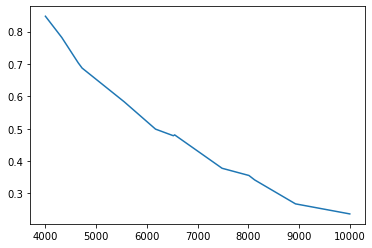

In [57]:
plt.figure()
plt.plot(wav,interp)


In [15]:
len(df)

683

In [21]:
df = get_extinction(df)

In [23]:
df

,raMean,decMean,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag,gMeanPSFMagErr,rMeanPSFMagErr,iMeanPSFMagErr,...,slr_zint,sfd_zint,b19_zint,slr_yint,sfd_yint,b19_yint,PS1 g AV,PS1 r AV,PS1 i AV,PS1 z AV
0,89.602529,71.364914,17.714300,16.720200,16.284901,16.075899,15.911700,0.003182,0.002209,0.002709,...,15.921809,15.793867,15.797079,15.783155,15.677554,15.680220,0.6693749999999999,0.4960422535211268,0.3751412429378531,0.29053694581280787
1,89.684778,71.366033,18.364300,17.893600,17.681499,17.596001,17.523001,0.008532,0.005465,0.004327,...,17.441911,17.311112,17.317181,17.394456,17.286483,17.291521,0.6820025,0.5059014084507043,0.38301129943502826,0.29613793103448277
2,89.773320,71.365959,17.065201,16.515699,16.289900,16.197300,16.113800,0.002301,0.003593,0.002802,...,16.043210,15.910577,15.918480,15.985255,15.875759,15.882320,0.68381625,0.5069014084507043,0.38301129943502826,0.29713793103448277
3,89.813637,71.364667,18.219299,17.487600,17.139700,17.007401,16.841400,0.010067,0.006121,0.002494,...,16.853311,16.720221,16.728581,16.712855,16.602980,16.609920,0.6848162499999999,0.5070422535211269,0.38401129943502826,0.29713793103448277
4,89.977369,71.370532,18.365700,17.647301,17.330799,17.195400,17.089100,0.005453,0.005758,0.004042,...,17.041311,16.907405,16.932070,16.960555,16.850002,16.870480,0.68381625,0.5069014084507043,0.38401129943502826,0.29713793103448277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,89.716315,71.484590,18.721201,17.425900,16.706200,16.353500,16.131800,0.009280,0.003943,0.002812,...,16.199411,16.049967,16.012720,16.003255,15.879802,15.848880,0.7120712499999999,0.5277605633802818,0.3990112994350283,0.30903940886699505
96,89.853497,71.483616,18.839800,18.300800,18.080999,17.980499,17.883600,0.009292,0.006630,0.005776,...,17.826410,17.679629,17.639719,17.755055,17.633814,17.600680,0.722885,0.5357605633802818,0.4057514124293785,0.31433990147783253
97,89.915310,71.483985,17.335600,16.692101,16.409401,16.287800,16.178499,0.002178,0.003189,0.004089,...,16.133710,15.986105,15.947020,16.049954,15.928029,15.895579,0.720885,0.5347605633802818,0.4047514124293785,0.3133399014778325
98,89.934111,71.488948,18.993799,18.088600,17.701200,17.236799,16.871401,0.010487,0.006804,0.015942,...,17.082710,16.933975,16.896019,16.742856,16.619992,16.588481,0.720885,0.5347605633802818,0.4047514124293785,0.3133399014778325


In [42]:
d_gr = (df['gMeanPSFMag'] - df['PS1 g AV']) - (df['rMeanPSFMag'] - df['PS1 r AV'])
d_ri = (df['rMeanPSFMag'] - df['PS1 r AV']) - (df['iMeanPSFMag'] - df['PS1 i AV'])

g_gr = (df['gMeanPSFMag'] - df['sfd_ext']*3.384) - (df['rMeanPSFMag'] - df['sfd_ext']*2.483)
g_ri = (df['rMeanPSFMag'] - df['sfd_ext']*2.483) - (df['iMeanPSFMag'] - df['sfd_ext']*1.838)

slr_gr = df['slr_gint'] - df['slr_rint']
slr_ri = df['slr_rint'] - df['slr_iint']

In [33]:
tonry = np.loadtxt('Tonry_splines.txt')

In [35]:
tonry.shape

(2486, 3)

<IPython.core.display.Javascript object>


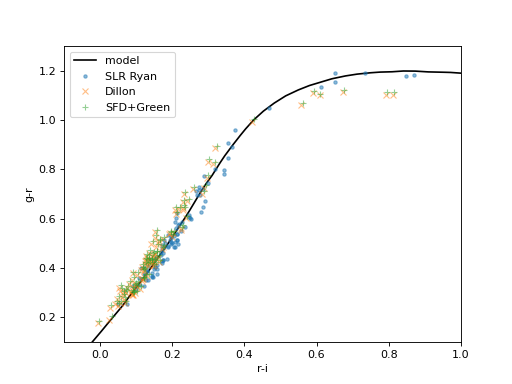

Text(0, 0.5, 'g-r')

In [49]:
plt.figure()
plt.plot(tonry[:,0],tonry[:,1],'k-',label='model')
plt.plot(slr_ri,slr_gr,'.',label='SLR Ryan',alpha=0.5)
plt.plot(d_ri,d_gr,'x',label='Dillon',alpha=0.5)
plt.plot(g_ri,g_gr,'+',label='SFD+Green',alpha=0.5)
plt.xlim(-.1,1)
plt.ylim(.1,1.3)
plt.legend()
plt.xlabel('r-i')
plt.ylabel('g-r')


In [65]:
d_gr.values

array([0.8207678241998266, 0.29459821875340353, 0.3725865775181063,
       0.5539249933893267, 0.5414842063023038, 0.3627398572809266,
       0.5150845938755033, 0.2994255579645273, 0.3479704746128043,
       0.5023268488580257, 1.0597265986139277, 0.42232692515193193,
       0.8846262720757316, 0.3653838797642024, 0.33492608439272686,
       0.29128529272800563, 0.35387181128270484, 0.6445712207676024,
       0.4119710086704025, 0.6697171887464819, 0.3890944971734278,
       0.44983988627262583, 0.5259396863824257, 0.46149830420260507,
       0.5354850455357045, 0.5070846243931051, 0.3294705509068052,
       0.4120395017511278, 0.25553868540582947, 0.3166396451837237,
       0.4262704013707044, 0.42337123144870503, 1.102671539676205,
       0.30131661501608065, 0.29002271738822927, 0.4757850333286022,
       0.7000854178501044, 0.3540583206821033, 0.2954020654554821,
       0.6360214814263259, 0.3157204255182293, 0.5415218934137247,
       0.32027140845070434, 0.40257104529150567, 0.5

In [73]:
g_ri

0     0.317861
1     0.093474
2     0.106409
3     0.228320
4     0.196581
        ...   
95    0.593309
96    0.094519
97    0.157075
98    0.261305
99    0.069514
Length: 100, dtype: float64

In [74]:
d_ri.values.astype('float64')

array([ 0.31439791,  0.08921087,  0.10190945,  0.22486944,  0.19361151,
        0.12186934,  0.17390996,  0.07106943,  0.11711102,  0.16126835,
        0.5576688 ,  0.16226971,  0.31966984,  0.13121014,  0.08046884,
        0.09041005,  0.11831074,  0.22880998,  0.15010896,  0.24225022,
        0.12059863,  0.14266898,  0.19836873,  0.13431054,  0.19171124,
        0.16421109,  0.09591029,  0.13606956,  0.06906917,  0.07536859,
        0.12431071,  0.14111064,  0.79150834,  0.08612204,  0.08772777,
        0.17100888,  0.23250943,  0.1162091 ,  0.06372064,  0.23052906,
        0.11062931,  0.20192932,  0.10110972,  0.1164808 ,  0.15102039,
        0.20991932,  0.09649778,  0.15501085,  0.11320939,  0.21680894,
       -0.00569091,  0.28252199,  0.14931999,  0.81087994,  0.05332027,
        0.15282093,  0.13113149,  0.09088734,  0.28916807,  0.10001054,
        0.2966203 ,  0.13822072,  0.12877965,  0.15282093,  0.14662204,
        0.04169078,  0.13268943,  0.23108795,  0.12808922,  0.15

<IPython.core.display.Javascript object>


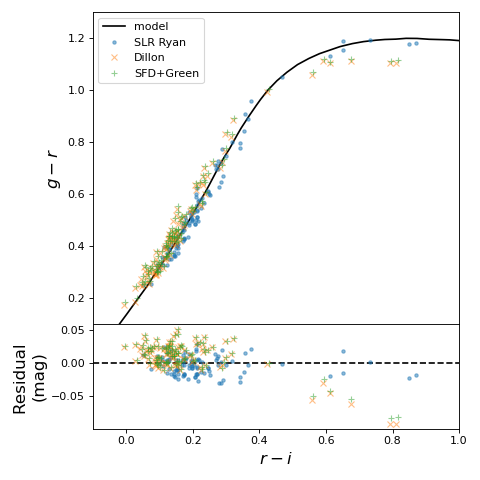

In [77]:
compare = np.array([['r-i','g-r']])   
layout = """
         A
         A
         A
         B
         """
fig = plt.figure(figsize=(6,6))
ax_dict = fig.subplot_mosaic(layout)

ax = ax_dict['A']
dist_ryan = Calculate_distance(np.array([slr_ri,slr_gr]), np.array([tonry[:,0],tonry[:,1]]))
dist_dillon = Calculate_distance(np.array([d_ri.values.astype('float64'),d_gr.values.astype('float64')]), np.array([tonry[:,0],tonry[:,1]]))
dist_green = Calculate_distance(np.array([g_ri,g_gr]), np.array([tonry[:,0],tonry[:,1]]))


ax.plot(tonry[:,0],tonry[:,1],'k-',label='model')
ax.plot(slr_ri,slr_gr,'.',label='SLR Ryan',alpha=0.5)
ax.plot(d_ri,d_gr,'x',label='Dillon',alpha=0.5)
ax.plot(g_ri,g_gr,'+',label='SFD+Green',alpha=0.5)



ax.axes.xaxis.set_visible(False)
ax.set_xlim(-.1,1)
ax.set_ylim(.1,1.3)

ax.set_ylabel('$g-r$',fontsize=15)
ax.legend()

ax = ax_dict['B']
ax.axhline(0,color='k',ls='--')
ax.plot(slr_ri,dist_ryan,'.',alpha=.5)
ax.plot(d_ri,dist_dillon,'x',alpha=.5)
ax.plot(g_ri,dist_green,'+',alpha=.5)

ax.set_xlim(-.1,1)

ax.set_ylabel('Residual \n(mag)',fontsize=15)
ax.set_xlabel('$r-i$',fontsize=15)
#plt.tight_layout()

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig('Extinction_ryan_dillon_green.pdf')

<IPython.core.display.Javascript object>


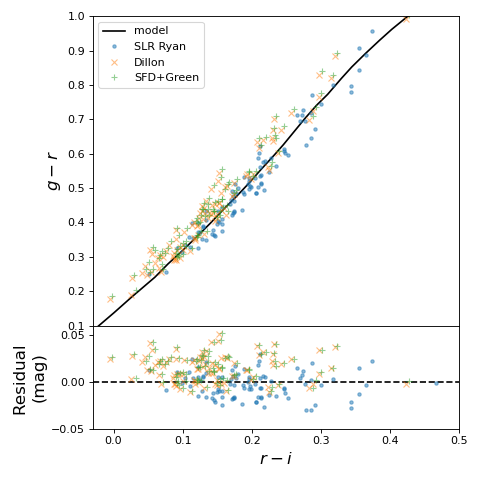

In [94]:
compare = np.array([['r-i','g-r']])   
layout = """
         A
         A
         A
         B
         """
fig = plt.figure(figsize=(6,6))
ax_dict = fig.subplot_mosaic(layout)

ax = ax_dict['A']
dist_ryan = Calculate_distance(np.array([slr_ri,slr_gr]), np.array([tonry[:,0],tonry[:,1]]))
dist_dillon = Calculate_distance(np.array([d_ri.values.astype('float64'),d_gr.values.astype('float64')]), np.array([tonry[:,0],tonry[:,1]]))
dist_green = Calculate_distance(np.array([g_ri,g_gr]), np.array([tonry[:,0],tonry[:,1]]))


ax.plot(tonry[:,0],tonry[:,1],'k-',label='model')
ax.plot(slr_ri,slr_gr,'.',label='SLR Ryan',alpha=0.5)
ax.plot(d_ri,d_gr,'x',label='Dillon',alpha=0.5)
ax.plot(g_ri,g_gr,'+',label='SFD+Green',alpha=0.5)



ax.axes.xaxis.set_visible(False)
ax.set_xlim(-.03,0.5)
ax.set_ylim(.1,1)

ax.set_ylabel('$g-r$',fontsize=15)
ax.legend()

ax = ax_dict['B']
ax.axhline(0,color='k',ls='--')
ax.plot(slr_ri,dist_ryan,'.',alpha=.5)
ax.plot(d_ri,dist_dillon,'x',alpha=.5)
ax.plot(g_ri,dist_green,'+',alpha=.5)

ax.set_xlim(-.03,0.5)
ax.set_ylim(-0.05,0.06)

ax.set_ylabel('Residual \n(mag)',fontsize=15)
ax.set_xlabel('$r-i$',fontsize=15)
#plt.tight_layout()

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig('Extinction_ryan_dillon_green_zoom.pdf')

In [83]:
d_ind = (d_ri.values<.4) & (d_ri.values>0)
slr_ind = (slr_ri.values<.4) & (slr_ri.values>0)
g_ind = (g_ri.values<.4) & (g_ri.values>0)

In [86]:
np.nanmean(dist_dillon[d_ind])

0.014646787679452315

In [87]:
np.nanmean(dist_green[g_ind])

0.015865647502045305

In [88]:
np.nanmean(dist_ryan[slr_ind])

-0.0032529079390852538

In [51]:
list(df.keys())

['raMean',
 'decMean',
 'gMeanPSFMag',
 'rMeanPSFMag',
 'iMeanPSFMag',
 'zMeanPSFMag',
 'yMeanPSFMag',
 'gMeanPSFMagErr',
 'rMeanPSFMagErr',
 'iMeanPSFMagErr',
 'zMeanPSFMagErr',
 'yMeanPSFMagErr',
 'slr_ext',
 'sfd_ext',
 'b19_ext',
 'slr_Ag',
 'sfd_Ag',
 'b19_Ag',
 'slr_Ar',
 'sfd_Ar',
 'b19_Ar',
 'slr_Ai',
 'sfd_Ai',
 'b19_Ai',
 'slr_Az',
 'sfd_Az',
 'b19_Az',
 'slr_Ay',
 'sfd_Ay',
 'b19_Ay',
 'slr_gint',
 'sfd_gint',
 'b19_gint',
 'slr_rint',
 'sfd_rint',
 'b19_rint',
 'slr_iint',
 'sfd_iint',
 'b19_iint',
 'slr_zint',
 'sfd_zint',
 'b19_zint',
 'slr_yint',
 'sfd_yint',
 'b19_yint',
 'PS1 g AV',
 'PS1 r AV',
 'PS1 i AV',
 'PS1 z AV']

In [53]:
df['sfd_ext'] * 3.1

0      0.564428
1      0.570144
2      0.573816
3      0.574729
4      0.576363
         ...   
678    0.512434
679    0.522722
680    0.531671
681    0.544249
682    0.547736
Name: sfd_ext, Length: 683, dtype: float64

Text(0, 0.5, 'sfd Ag Brout')

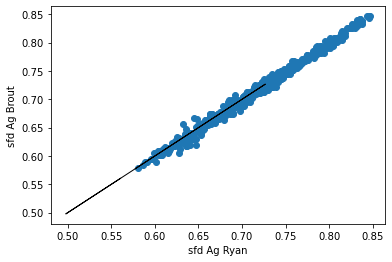

In [78]:
plt.scatter(df['sfd_Ag']*3.698/3.172,df['PS1 g AV'])
plt.plot(df['sfd_Ag'],df['sfd_Ag'],c='k',lw=1)
plt.xlabel('sfd Ag Ryan')
plt.ylabel('sfd Ag Brout')



In [1]:
plt.figure()
plt.scatter(df['PS1 g AV']/3.6982044198895028,df['slr_ext'].values)
#plt.plot(df['sfd_Ag'],df['sfd_Ag'],c='k',lw=1)
plt.xlabel('sfd Ag Ryan')
plt.ylabel('sfd Ag Brout')



NameError: name 'plt' is not defined

In [20]:
df['slr_ext']

0     0.10259
1     0.10259
2     0.10259
3     0.10259
4     0.10259
5     0.10259
6     0.10259
7     0.10259
8     0.10259
9     0.10259
10    0.10259
11    0.10259
12    0.10259
13    0.10259
14    0.10259
15    0.10259
16    0.10259
17    0.10259
18    0.10259
19    0.10259
Name: slr_ext, dtype: float64

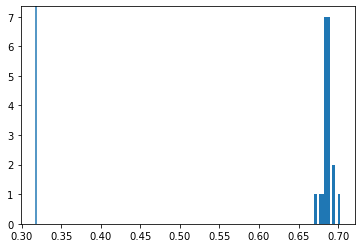

In [27]:
plt.figure()
plt.hist(df['PS1 g AV'],bins=10)
plt.axvline(df['slr_ext'].values[0]*3.1)

In [24]:
df['slr_Ag']

0     0.370926
1     0.370926
2     0.370926
3     0.370926
4     0.370926
5     0.370926
6     0.370926
7     0.370926
8     0.370926
9     0.370926
10    0.370926
11    0.370926
12    0.370926
13    0.370926
14    0.370926
15    0.370926
16    0.370926
17    0.370926
18    0.370926
19    0.370926
Name: slr_Ag, dtype: float64